In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [3]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [5]:
# dickey fuller test
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [9]:
#get data
series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

C:\Users\advan\AppData\Local\Temp\ipykernel_16836\4217659760.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)


In [11]:
#checking stationarity using dickey fuller test
perform_adf_test(series)

ADF Statistic: -7.162321
p-value: 0.000000


The p value is significantly low, that means our data is stationary

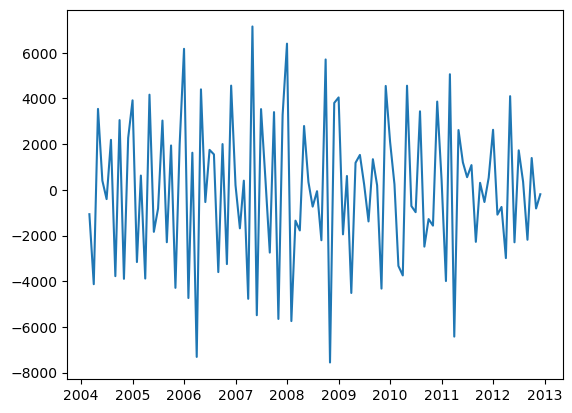

In [14]:
plt.plot(series)

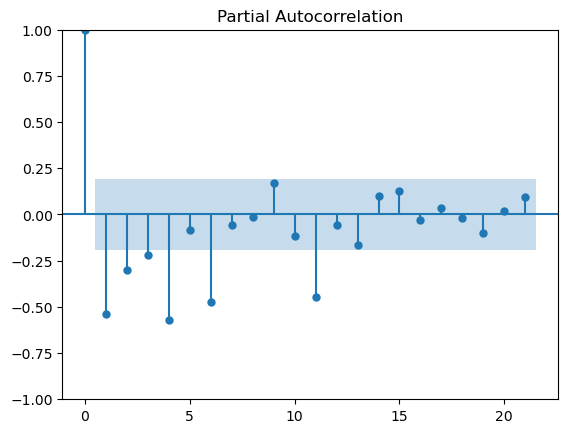

In [18]:
# PACF
plot_pacf(series)
plt.show()

#### Looking at the plot, we can say lags 1, 4, 6, 11 are the most strongest ones

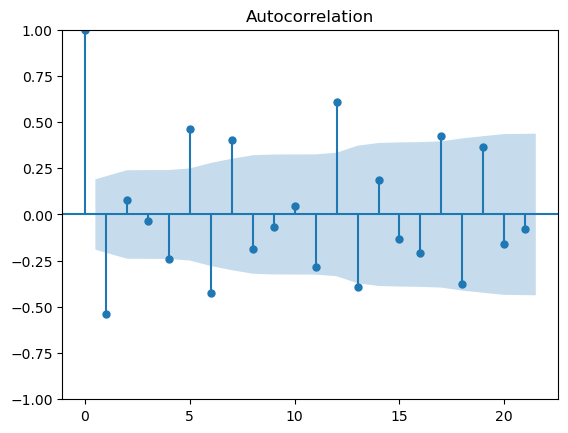

In [20]:
# ACF
plot_acf(series)
plt.show()

### Comparing AR(1). AR(4), AR(6), AR(11) to find the best model

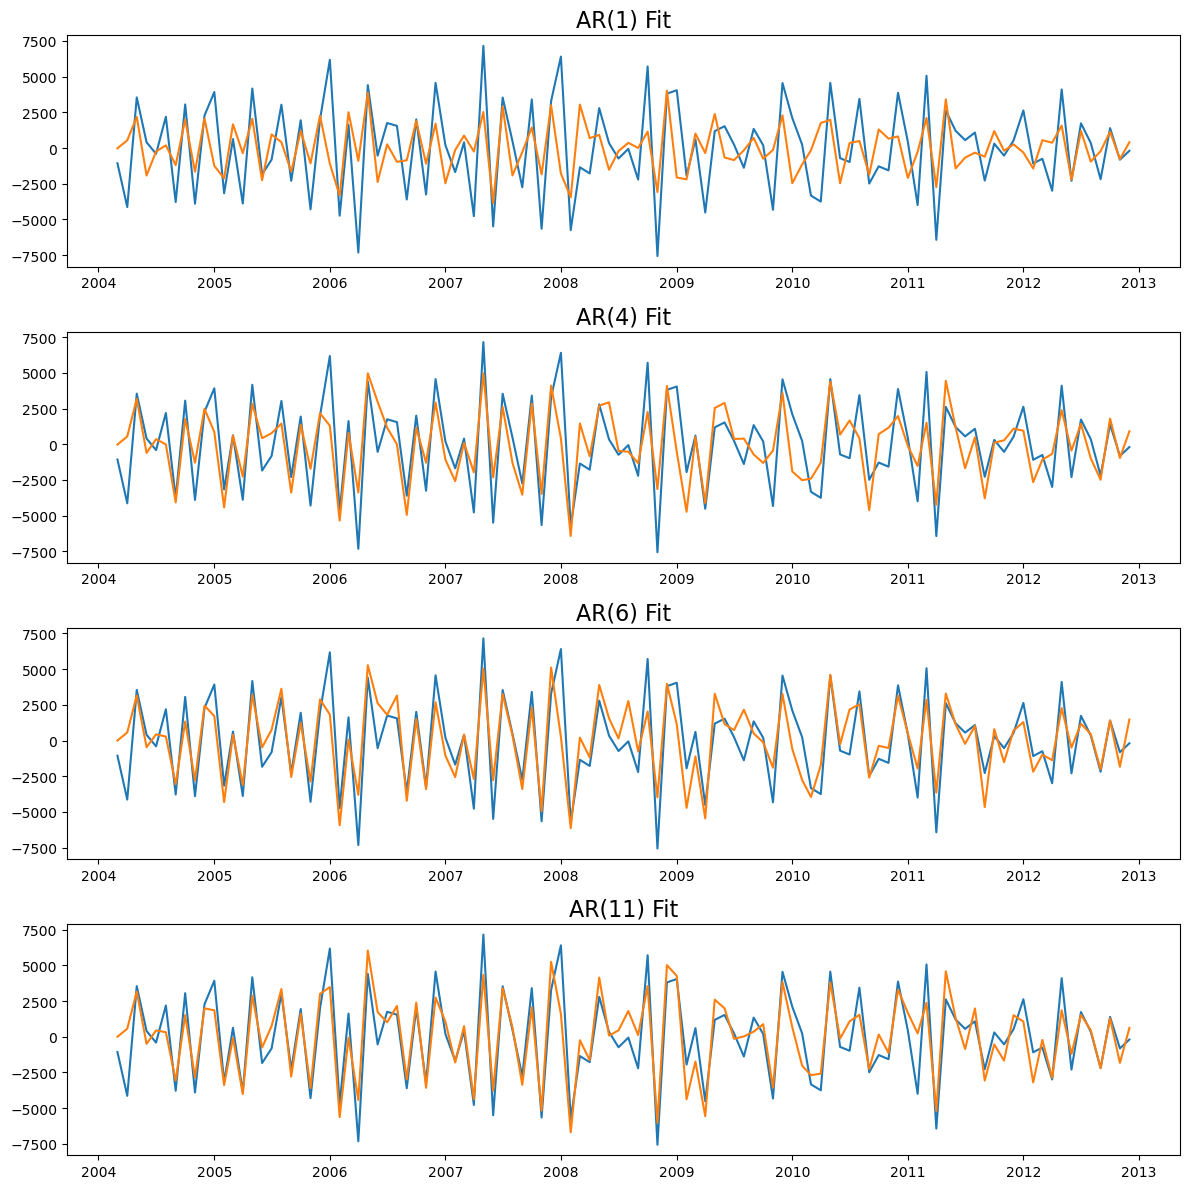

In [25]:
plt.figure(figsize=(12,12))

ar_orders = [1, 4, 6, 11]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0, 0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()

#### For getting the best model, we will compare AIC and BIC values. Lower the AIC and BIC values, better the model.

In [28]:
#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 1980.860621744531
AIC for AR(4): 1927.6099852660268
AIC for AR(6): 1899.649744257552
AIC for AR(11): 1872.8283400413093


In [32]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 1988.8509390268673
BIC for AR(4): 1943.590619830699
BIC for AR(6): 1920.9572570104485
BIC for AR(11): 1907.453048264766


#### The best model is AR(11) as both AIC and BIC are the lowest for that